In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

set_name = 'DataSet01_300_950Hz_snap=5'
# Training Data
X_train = np.loadtxt( './data/' + set_name + '/SBCEx16_training_input.txt')
y_train = np.loadtxt( './data/'+ set_name + '/training_labels.txt')
Range_train = np.loadtxt( './data/'+ set_name  + '/Mapping_range_labels.txt')

# Test Data
X_test = np.loadtxt( './data/'+ set_name + '/SBCEx16_test_input.txt')
y_test = np.loadtxt( './data/'+ set_name + '/test_Ranges.txt')

In [4]:
def MAPE(pred, y):
    # the pred here should be Z_out
    # the y should be y_test
    n = len(y)
    return sum(np.abs(pred - y) / y) / n

### feature selection

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [6]:
clf = ExtraTreesClassifier()
clf = clf.fit(X_train, y_train)
model = SelectFromModel(clf, prefit=True)

In [7]:
X_train2 = model.transform(X_train)
X_test2 = model.transform(X_test)

In [8]:
X_train2.shape

(890, 4560)

### SVM

tunning

svc linear done!
lin_svc done!
SVC with linear kernel MAPE =  2.13147375523
LinearSVC (linear kernel) MAPE =  0.154479762938
the regularization is C =  0.0001


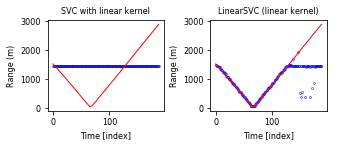

svc linear done!
lin_svc done!
SVC with linear kernel MAPE =  2.13147375523
LinearSVC (linear kernel) MAPE =  0.10771348406
the regularization is C =  0.001


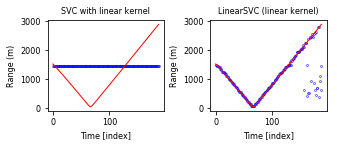

svc linear done!
lin_svc done!
SVC with linear kernel MAPE =  0.147245670108
LinearSVC (linear kernel) MAPE =  0.0995156024384
the regularization is C =  0.01


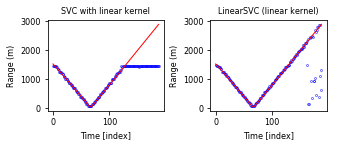

svc linear done!
lin_svc done!
SVC with linear kernel MAPE =  0.156786473357
LinearSVC (linear kernel) MAPE =  0.1712044339
the regularization is C =  0.1


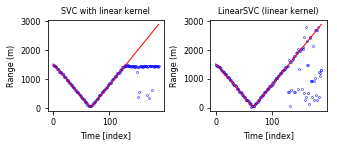

svc linear done!
lin_svc done!
SVC with linear kernel MAPE =  0.161685940602
LinearSVC (linear kernel) MAPE =  0.164363278127
the regularization is C =  1


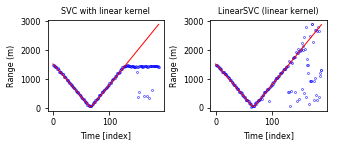

In [16]:
for C in [0.0001, 0.001, 0.01, 0.1, 1]:
    #C = 100  # SVM regularization parameter
    svc = svm.SVC(kernel='linear', C=C).fit(X_train2, y_train)
    print('svc linear done!')
    lin_svc = svm.LinearSVC(C=C).fit(X_train2, y_train)
    print('lin_svc done!')
    
    # title for the plots
    titles = ['SVC with linear kernel',
              'LinearSVC (linear kernel)']

    fig=plt.figure(figsize=(5.0,4.0))
    for i, clf in enumerate((svc, lin_svc)):
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(X_test2)
        #print(Z)
        Z_out = Range_train[Z.astype(np.int32)]

        plt.plot(Z_out,"o",markersize=2,markeredgewidth=0.5,markeredgecolor='b',markerfacecolor='none')

        ##when test for Y_train
        #Yt = Range_train[Y_train.astype(np.int32)]
        #plt.plot(Yt,'r',linewidth=1.0)

        plt.plot(y_test,'r',linewidth=1.0)

        plt.xlabel('Time [index]',fontsize=8)
        plt.ylabel('Range (m)',fontsize=8)
        plt.tick_params(axis='both', which='major', labelsize=8)
        plt.tick_params(axis='both', which='minor', labelsize=8)
        plt.title(titles[i],fontsize=8)
        print titles[i], "MAPE = ", MAPE(Z_out, y_test)
    
    print "the regularization is C = ", C
    
    plt.show()
    #fig.savefig('Fig_SVMpred_DataSet01.jpg', dpi=300)    

SVM with linear kernel: C = 0.01  

Linear SVC: C = 0.01

rbf_svc done!
poly_svc done!
SVC with RBF kernel (gama=1/149) MAPE =  2.13147375523
SVC with polynomial (degree 1) kernel MAPE =  2.13147375523
C =  1 gamma =  0.002


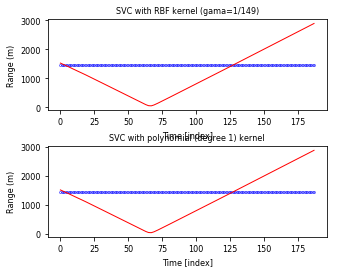

rbf_svc done!
poly_svc done!
SVC with RBF kernel (gama=1/149) MAPE =  0.154236365058
SVC with polynomial (degree 1) kernel MAPE =  0.151825874602
C =  10 gamma =  0.002


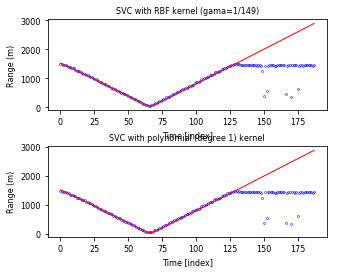

rbf_svc done!
poly_svc done!
SVC with RBF kernel (gama=1/149) MAPE =  0.156664485935
SVC with polynomial (degree 1) kernel MAPE =  0.156504436232
C =  25 gamma =  0.002


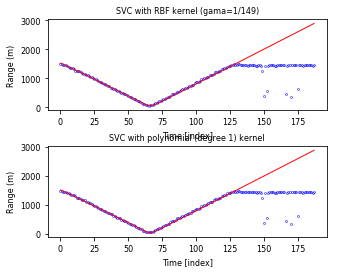

rbf_svc done!
poly_svc done!
SVC with RBF kernel (gama=1/149) MAPE =  0.161176389158
SVC with polynomial (degree 1) kernel MAPE =  0.156786473357
C =  50 gamma =  0.002


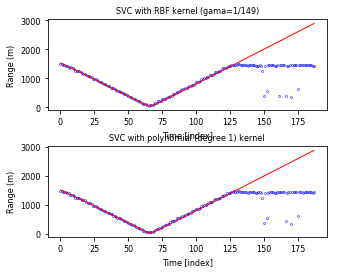

rbf_svc done!
poly_svc done!
SVC with RBF kernel (gama=1/149) MAPE =  0.906414076898
SVC with polynomial (degree 1) kernel MAPE =  2.13147375523
C =  1 gamma =  0.004


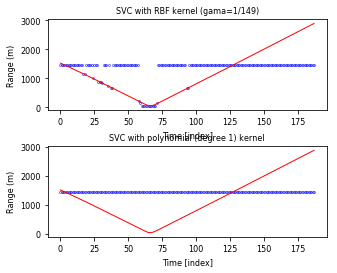

rbf_svc done!
poly_svc done!
SVC with RBF kernel (gama=1/149) MAPE =  0.156382919831
SVC with polynomial (degree 1) kernel MAPE =  0.154307467906
C =  10 gamma =  0.004


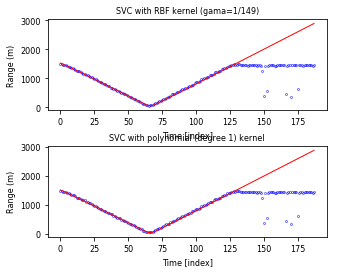

rbf_svc done!
poly_svc done!
SVC with RBF kernel (gama=1/149) MAPE =  0.160919182556
SVC with polynomial (degree 1) kernel MAPE =  0.156786473357
C =  25 gamma =  0.004


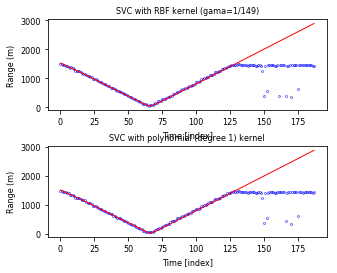

rbf_svc done!
poly_svc done!
SVC with RBF kernel (gama=1/149) MAPE =  0.161483358841
SVC with polynomial (degree 1) kernel MAPE =  0.161134652252
C =  50 gamma =  0.004


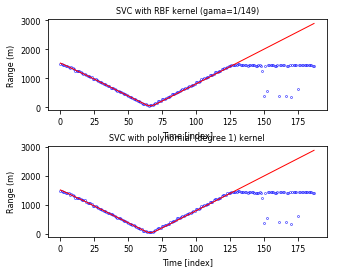

rbf_svc done!
poly_svc done!
SVC with RBF kernel (gama=1/149) MAPE =  0.275095775213
SVC with polynomial (degree 1) kernel MAPE =  1.51377930789
C =  1 gamma =  0.005


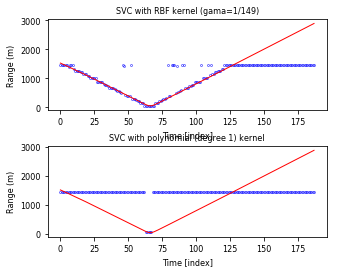

rbf_svc done!
poly_svc done!
SVC with RBF kernel (gama=1/149) MAPE =  0.156755186532
SVC with polynomial (degree 1) kernel MAPE =  0.156504436232
C =  10 gamma =  0.005


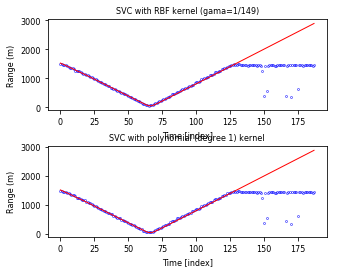

rbf_svc done!
poly_svc done!
SVC with RBF kernel (gama=1/149) MAPE =  0.159038857147
SVC with polynomial (degree 1) kernel MAPE =  0.157165263242
C =  25 gamma =  0.005


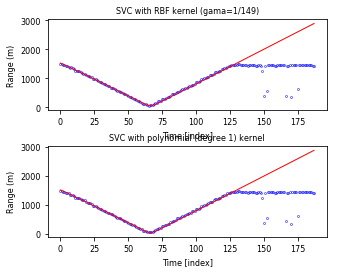

rbf_svc done!
poly_svc done!
SVC with RBF kernel (gama=1/149) MAPE =  0.159038857147
SVC with polynomial (degree 1) kernel MAPE =  0.161685940602
C =  50 gamma =  0.005


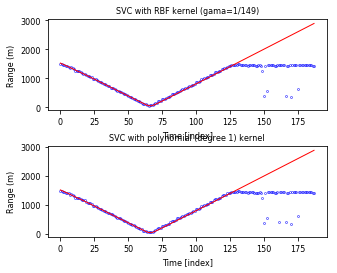

rbf_svc done!
poly_svc done!
SVC with RBF kernel (gama=1/149) MAPE =  0.146631814609
SVC with polynomial (degree 1) kernel MAPE =  0.991463753965
C =  1 gamma =  0.00671140939597


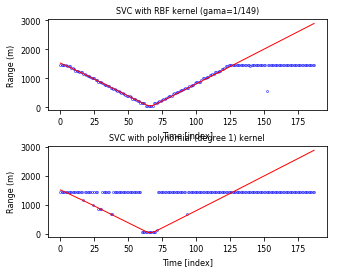

rbf_svc done!
poly_svc done!
SVC with RBF kernel (gama=1/149) MAPE =  0.154014874197
SVC with polynomial (degree 1) kernel MAPE =  0.156382919831
C =  10 gamma =  0.00671140939597


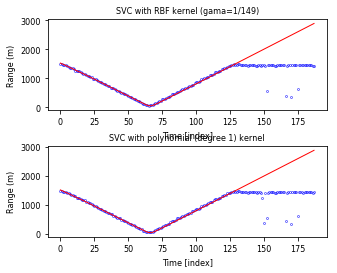

rbf_svc done!
poly_svc done!
SVC with RBF kernel (gama=1/149) MAPE =  0.155635560215
SVC with polynomial (degree 1) kernel MAPE =  0.161222769016
C =  25 gamma =  0.00671140939597


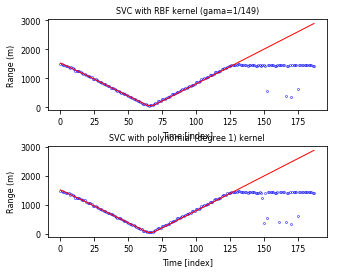

rbf_svc done!
poly_svc done!
SVC with RBF kernel (gama=1/149) MAPE =  0.155635560215
SVC with polynomial (degree 1) kernel MAPE =  0.161685940602
C =  50 gamma =  0.00671140939597


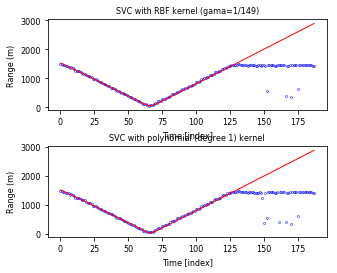

rbf_svc done!
poly_svc done!
SVC with RBF kernel (gama=1/149) MAPE =  0.144816218517
SVC with polynomial (degree 1) kernel MAPE =  0.147245670108
C =  1 gamma =  0.01


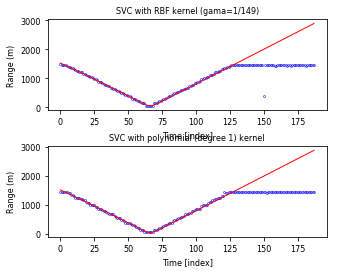

KeyboardInterrupt: 

In [21]:
for g in [1/500.0, 1/250.0, 1/200.0, 1/149.0, 1/100.0, 1/50.0, 1/20.0]:
    for C in [1, 10, 25, 50]:
        rbf_svc = svm.SVC(kernel='rbf', gamma=g, C=C).fit(X_train2, y_train)
        print('rbf_svc done!')
        poly_svc = svm.SVC(kernel='poly', gamma=g, degree = 1, C=C).fit(X_train2, y_train)
        print('poly_svc done!')

        # title for the plots
        titles = ['SVC with RBF kernel (gama=1/149)',
                  'SVC with polynomial (degree 1) kernel']

        fig=plt.figure(figsize=(5.0,4.0))
        for i, clf in enumerate((rbf_svc, poly_svc)):
            plt.subplot(2, 1, i + 1)
            plt.subplots_adjust(wspace=0.4, hspace=0.4)

            Z = clf.predict(X_test2)
            #print(Z)
            Z_out = Range_train[Z.astype(np.int32)]

            plt.plot(Z_out,"o",markersize=2,markeredgewidth=0.5,markeredgecolor='b',markerfacecolor='none')

            ##when test for Y_train
            #Yt = Range_train[Y_train.astype(np.int32)]
            #plt.plot(Yt,'r',linewidth=1.0)

            plt.plot(y_test,'r',linewidth=1.0)
            plt.xlabel('Time [index]',fontsize=8)
            plt.ylabel('Range (m)',fontsize=8)
            plt.tick_params(axis='both', which='major', labelsize=8)
            plt.tick_params(axis='both', which='minor', labelsize=8)
            plt.title(titles[i],fontsize=8)
            print titles[i], "MAPE = ", MAPE(Z_out, y_test)

        print "C = ", C, 'gamma = ', g
        plt.show()
        #fig.savefig('Fig_SVMpred_DataSet01.jpg', dpi=300)    

for SVM gaussian kernel - best params C = 10, gamma = 0.004

for poly  kernel - best params C = 10, gamma = 0.004

svc linear done!
rbf_svc done!
poly_svc done!
lin_svc done!
SVC with linear kernel MAPE =  0.147245670108


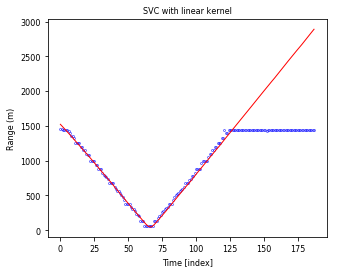

LinearSVC (linear kernel) MAPE =  0.0995156024384


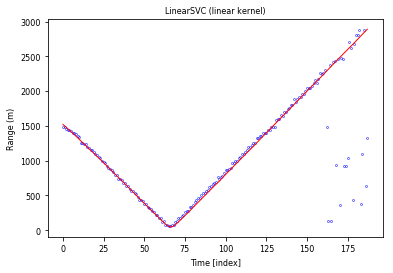

SVC with RBF kernel (gamma=0.004) MAPE =  0.156382919831


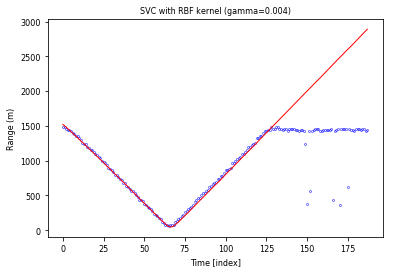

SVC with polynomial (degree 1) kernel MAPE =  0.154307467906


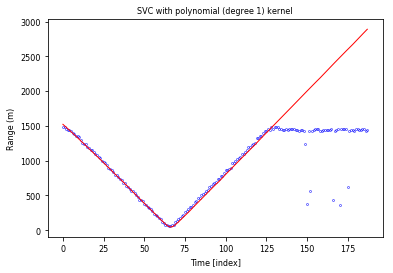

In [23]:
svc = svm.SVC(kernel='linear', C=0.01).fit(X_train2, y_train)
print('svc linear done!')
rbf_svc = svm.SVC(kernel='rbf', gamma=0.004, C=10).fit(X_train2, y_train)
print('rbf_svc done!')
poly_svc = svm.SVC(kernel='poly', gamma=0.004,degree=1, C=10).fit(X_train2, y_train)
print('poly_svc done!')
lin_svc = svm.LinearSVC(C=0.01).fit(X_train2, y_train)
print('lin_svc done!')

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel (gamma=0.004)',
          'SVC with polynomial (degree 1) kernel']

fig=plt.figure(figsize=(5.0,4.0))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):

    Z = clf.predict(X_test2)
    #print(Z)
    Z_out = Range_train[Z.astype(np.int32)]

    plt.plot(Z_out,"o",markersize=2,markeredgewidth=0.5,markeredgecolor='b',markerfacecolor='none')

    ##when test for Y_train
    #Yt = Range_train[Y_train.astype(np.int32)]
    #plt.plot(Yt,'r',linewidth=1.0)

    plt.plot(y_test,'r',linewidth=1.0)

    plt.xlabel('Time [index]',fontsize=8)
    plt.ylabel('Range (m)',fontsize=8)
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='both', which='minor', labelsize=8)
    plt.title(titles[i],fontsize=8)
    print titles[i], "MAPE = ", MAPE(Z_out, y_test)
    plt.show()
#fig.savefig('Fig_SVMpred_DataSet01.jpg', dpi=300)    

### Random Forest

In [9]:
# random forest
from sklearn.ensemble import RandomForestClassifier

In [10]:
clf_RF = RandomForestClassifier(n_estimators = 1000, max_depth = 120)
clf_RF.fit(X_train2, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=120, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

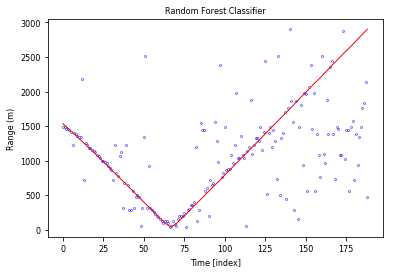

In [11]:
Z = clf_RF.predict(X_test2)
#print(Z)
Z_out = Range_train[Z.astype(np.int32)]

plt.plot(Z_out,"o",markersize=2,markeredgewidth=0.5,markeredgecolor='b',markerfacecolor='none')
plt.plot(y_test,'r',linewidth=1.0)

plt.xlabel('Time [index]',fontsize=8)
plt.ylabel('Range (m)',fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.title('Random Forest Classifier',fontsize=8)

plt.show()
#fig.savefig('Fig_RFpred_DataSet01.jpg', dpi=300)

In [12]:
print MAPE(Z_out, y_test)

0.374908926606


MAPE =  1.05069149115


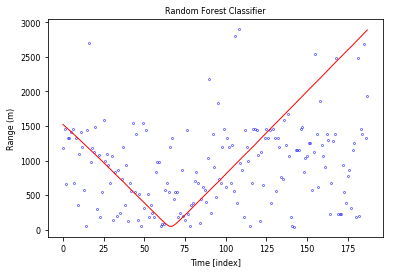

MAPE =  1.02639970795


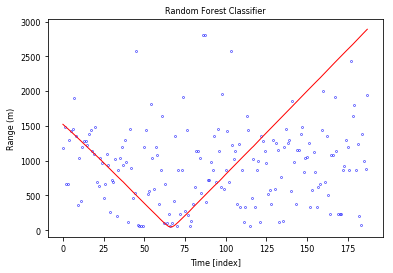

MAPE =  1.04489165027


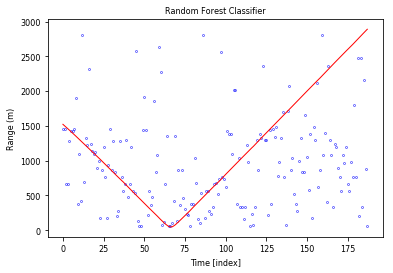

MAPE =  1.03503284737


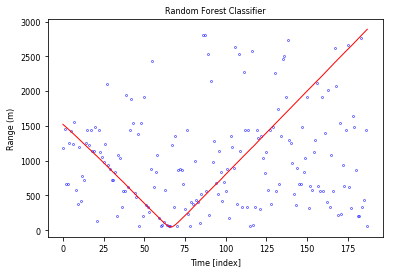

MAPE =  0.801518718388


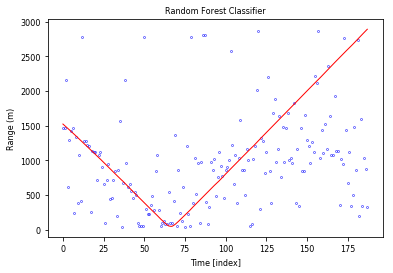

In [8]:
for i in [20, 40, 60, 80, 100]:
    clf_RF = RandomForestClassifier(n_estimators = 20, max_features = 0.8, max_depth = i)
    clf_RF.fit(X_train2, y_train)
    Z = clf_RF.predict(X_test2)
    #print(Z)
    Z_out = Range_train[Z.astype(np.int32)]
    plt.plot(Z_out,"o",markersize=2,markeredgewidth=0.5,markeredgecolor='b',markerfacecolor='none')
    plt.plot(y_test,'r',linewidth=1.0)

    plt.xlabel('Time [index]',fontsize=8)
    plt.ylabel('Range (m)',fontsize=8)
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tick_params(axis='both', which='minor', labelsize=8)
    plt.title('Random Forest Classifier',fontsize=8)
    
    print "MAPE = ", MAPE(Z_out, y_test)
    plt.show()
#    fig.savefig('Fig_RFpred_DataSet01.jpg', dpi=300)